In [129]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

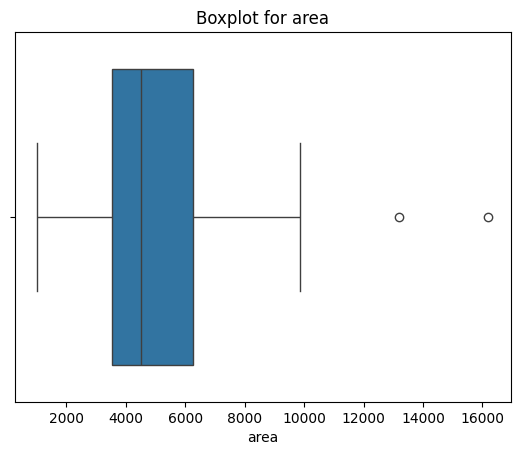

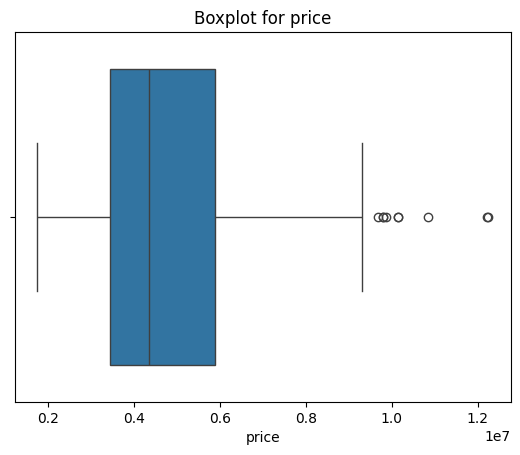

In [130]:
data = pd.read_csv("Housing_train_test.csv")
X = data['area'].values.reshape(-1, 1)
y = data['price'].values.reshape(-1, 1)

data.describe()
import seaborn as sns
import matplotlib.pyplot as plt

for col in data.columns:
    if data[col].dtype in ['int64', 'float64'] :
        sns.boxplot(x=data[col])
        plt.title(f'Boxplot for {col}')
        plt.show()

data = data.drop_duplicates()
data = data[data['area'] <= 8000]
data = data[data['price'] <= 8000000]

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [132]:
model = LogisticRegression(max_iter=22000, random_state=42)
model.fit(X_train, y_train)

C:\Users\Nathan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nathan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 14461 iteration(s) (status=1):
STOP: TOTAL NO. OF F,G EVALUATIONS EXCEEDS LIMIT

You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,22000
,multi_class,'deprecated'


In [133]:
validation_data = pd.read_csv('Housing_validation.csv')
X_val = validation_data['area'].values.reshape(-1, 1)
y_val_pred = model.predict(X_val)
answer = pd.DataFrame({"area": validation_data['area'], "price": y_val_pred.ravel()})
answer.to_csv('Housing_prediction.csv', index=False)